# Multivariate Exploration of Data
---

## Non-Positional Encodings for Third Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('support-files/05_Multivariate/fuel-econ.csv')
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


In [3]:
# organize the categories 
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# turn it into a pandas' categorical variable 
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# overwrite the existing column (object) as categorical
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [4]:
# check to see if it worked
fuel_econ['VClass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3929 entries, 0 to 3928
Series name: VClass
Non-Null Count  Dtype   
--------------  -----   
3929 non-null   category
dtypes: category(1)
memory usage: 4.2 KB


In [5]:
# get only automatic or manual
fuel_econ['trans'].unique()

array(['Automatic (AM6)', 'Automatic (AM-S6)', 'Automatic (S6)',
       'Automatic 8-spd', 'Manual 6-spd', 'Automatic 6-spd',
       'Automatic (S5)', 'Automatic 7-spd', 'Automatic (AV-S6)',
       'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S7)', 'Automatic (variable gear ratios)',
       'Manual 5-spd', 'Automatic (AV-S8)', 'Automatic 4-spd',
       'Automatic 5-spd', 'Automatic (AM7)', 'Automatic (AV-S7)',
       'Automatic 9-spd', 'Automatic (AM-S8)', 'Automatic (A1)',
       'Automatic (AM8)', 'Automatic (S9)', 'Automatic (S10)',
       'Automatic (AV-S10)'], dtype=object)

In [6]:
# create new column with only auto or manual info
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [7]:
# check to see if it worked
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic


### How to use shape or size to encode a third variable in a scatter plot?

In [8]:
# get a subset of our sample to reduce overplotting
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

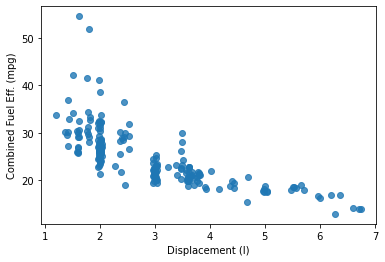

In [9]:
# combine the reduced sample with a small amount of 
# horizontal jitter
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Are there differences between cars with automatic transmission and manual transmission in terms of fuel efficiency and engine size? 

Since transmission type is categorical, shape is a good encoding to use.

The marker parameter can be used to set the shape of plotted points.

> Note 1: `regplot()` [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html)

> Note 2: [list](https://matplotlib.org/stable/api/markers_api.html) of matplotlib markers

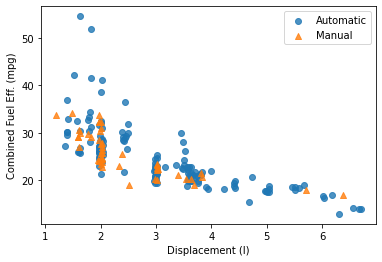

In [10]:
# the parameter can only take a single string,
# thus we need to create a loop to plot each subset of the data
# one by one
# setting this as a list of lists instead of a dict
# let us have finer control of the order in which the levels
# are plotted 
ttype_markers = [['Automatic', 'o'],
                ['Manual', '^']]

# loop over the list elements
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

Instead of transmission type, what if we wanted to add carbon dioxide as a third variable?

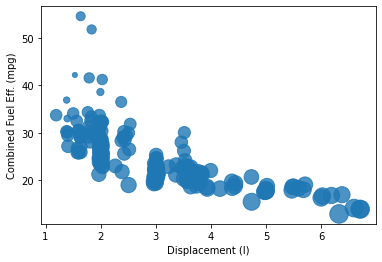

In [11]:
# use marker size ('s') to represent CO2
# as engine size increases, there is a higher level of C02 emissions
# the less fuel efficient cars also tend to have higher emissions
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', 
            x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/2})
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

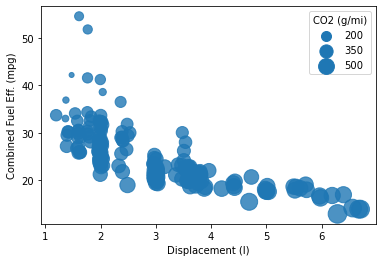

In [12]:
# setting a legend for this plot

sns.regplot(data=fuel_econ_subset, x='displ', y='comb', 
            x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/2})
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# three C02 values we want to use for the size legend reference
sizes = [200, 350, 500]

# set up a list to store all of our dummy scatter plot objects
legend_obj = []

# add dummy scatter plot sequences to construct our legend
for s in sizes: 
    # the first two arguments for x and y positions are empty lists
    # so no points are actually plotted
    legend_obj.append(plt.scatter([],[],s=s/2, color=sns.color_palette()[0]))
    
# the first argument is a list of objects to be depicted in the legend
# the second one is a list of labels
# the third is the legend title to give the units of the legend values
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

## Color Palettes

> Note: `sns.FacetGrid()` [documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid)

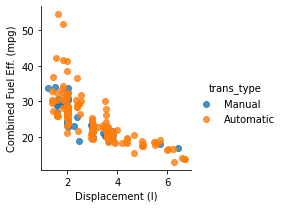

In [13]:
# for categorical data, we can use
# Seaborn's FacetGrid and set the hue argument
# to our column of choice
g = sns.FacetGrid(data=fuel_econ_subset, hue='trans_type')
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

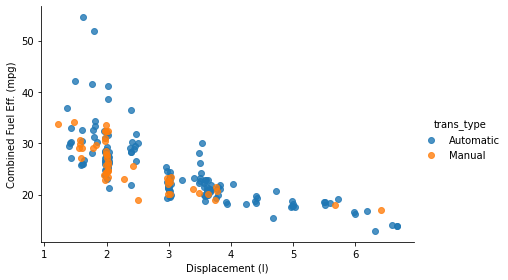

In [14]:
# making a few tweaks to the plot
# first, let's change the order in which the levels
# are plotted, so that the manual transmission points
# are plotted on top of automatic

# transmission type is a qualitative variable, so the default
# qualitative palette works great

g = sns.FacetGrid(data=fuel_econ_subset, hue='trans_type',
                 hue_order=['Automatic', 'Manual'], height=4, aspect=1.5)
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

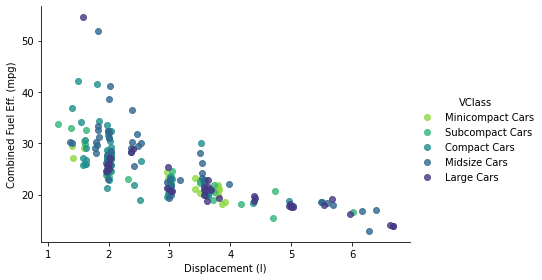

In [15]:
# plotting by vehicle class, an ordered variable
# a sequential palette would work better
# viridis_r goes from light to dark and it also has
# a good range of hues to further discriminate the 
# categorical variables
g = sns.FacetGrid(data=fuel_econ_subset, hue='VClass',
                 height=4, aspect=1.5, palette='viridis_r')
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

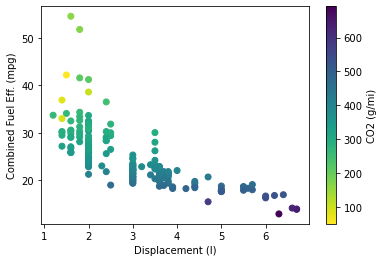

In [16]:
# what if we have a numerical variable instead?
# facetgrid only expects to facet across categorical variables
# so we should just use plt.scatter instead 
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c ='co2', cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [17]:
# standard qualitative palette
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [18]:
# sequential palette
sns.color_palette('viridis', 10)

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

In [19]:
# diverding palette
sns.color_palette('vlag', 10)

[(0.34125337, 0.50923419, 0.73874905),
 (0.49566225, 0.60454154, 0.76238852),
 (0.64061445, 0.70437326, 0.80497621),
 (0.79159841, 0.81658489, 0.86776906),
 (0.93827772, 0.9322888, 0.94432312),
 (0.96784372, 0.91616744, 0.91126063),
 (0.90235365, 0.77267117, 0.76467793),
 (0.84190106, 0.62760645, 0.61740899),
 (0.7862306, 0.49245398, 0.48267247),
 (0.72743485, 0.35773314, 0.35378465)]

### Warnings on Color
There are a couple of things to be aware of in general, when working with color. First of all, try and consider color blindness when selecting color for your plots. You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness simulator like [this one](http://www.color-blindness.com/coblis-color-blindness-simulator/).

Secondly, you want to be aware of the effect of transparency and overlap on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data. To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

### Encodings Practice
**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [20]:
pokemon = pd.read_csv('support-files/05_Multivariate/pokemon.csv')
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


In [21]:
poke_sample = np.random.choice(pokemon.shape[0], 200, replace=False)
pokemon_subset = pokemon.loc[poke_sample]

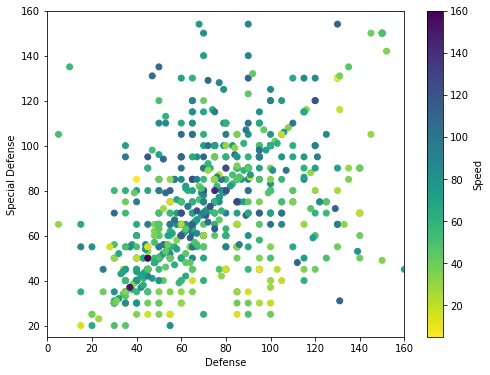

In [22]:
plt.figure(figsize=[8,6])
plt.scatter(data=pokemon, x='defense', y='special-defense', c='speed', cmap='viridis_r')
plt.colorbar(label='Speed')
plt.xlabel('Defense')
plt.ylabel('Special Defense')
plt.xlim(0,160)
plt.ylim(15,160);

From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two darkest points on the lower left of the diagonal.